In [1]:
!git clone https://github.com/pjreddie/darknet
%cd darknet
!make


C:\Users\gaurav\gitupload\darknet


fatal: destination path 'darknet' already exists and is not an empty directory.


gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/gemm.c -o obj/gemm.o


In file included from ./src/utils.h:5:0,
                 from ./src/gemm.c:2:
include/darknet.h:6:21: fatal error: pthread.h: No such file or directory
 #include <pthread.h>
                     ^
compilation terminated.
make: *** [Makefile:89: obj/gemm.o] Error 1


In [2]:
!wget https://pjreddie.com/media/files/yolov3.weights
!wget https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg
!wget https://raw.githubusercontent.com/pjreddie/darknet/master/data/coco.names


--2024-05-26 23:32:25--  https://pjreddie.com/media/files/yolov3.weights
Loaded CA certificate '/usr/ssl/certs/ca-bundle.crt'
Resolving pjreddie.com (pjreddie.com)... 162.0.215.52
Connecting to pjreddie.com (pjreddie.com)|162.0.215.52|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: 'yolov3.weights'

     0K .......... .......... .......... .......... ..........  0%  236K 17m5s
    50K .......... .......... .......... .......... ..........  0%  253K 16m30s
   100K .......... .......... .......... .......... ..........  0% 2.26M 11m35s
   150K .......... .......... .......... .......... ..........  0%  254K 12m39s
   200K .......... .......... .......... .......... ..........  0% 2.88M 10m23s
   250K .......... .......... .......... .......... ..........  0% 3.93M 8m49s
   300K .......... .......... .......... .......... ..........  0%  278K 9m38s
   350K .......... .......... .......... .......... .........

--2024-05-26 23:32:47--  https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg
Loaded CA certificate '/usr/ssl/certs/ca-bundle.crt'
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8342 (8.1K) [text/plain]
Saving to: 'yolov3.cfg'

     0K ........                                              100% 6.95M=0.001s

2024-05-26 23:32:48 (6.95 MB/s) - 'yolov3.cfg' saved [8342/8342]

--2024-05-26 23:32:48--  https://raw.githubusercontent.com/pjreddie/darknet/master/data/coco.names
Loaded CA certificate '/usr/ssl/certs/ca-bundle.crt'
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connec

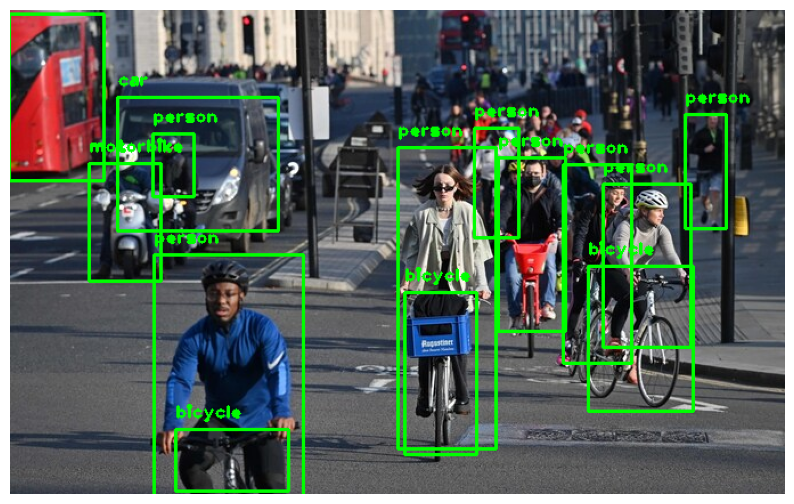

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load YOLO
net = cv2.dnn.readNet("yolov3.weights", "yolov3.cfg")
layer_names = net.getLayerNames()
output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]
classes = open("coco.names").read().strip().split("\n")

# Load Image
img = cv2.imread("C:/Users/gaurav/gitupload/example_image.jpeg")  # Adjust the path to the uploaded image
height, width, channels = img.shape

# Prepare the Image
blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
net.setInput(blob)

# Perform Detection
outs = net.forward(output_layers)

# Parse the Outputs
class_ids = []
confidences = []
boxes = []
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5:
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)
            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

# Apply Non-Maximum Suppression
indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

# Draw Bounding Boxes
font = cv2.FONT_HERSHEY_PLAIN
for i in range(len(boxes)):
    if i in indexes:
        x, y, w, h = boxes[i]
        label = str(classes[class_ids[i]])
        color = (0, 255, 0)
        cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
        cv2.putText(img, label, (x, y - 10), font, 1, color, 2)

# Display Image
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()
